In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
data = pd.read_csv('/Users/sosa/Documents/gasPriceData/gasPriceDiffForSanctions.csv', delimiter = ',')
data.head()

,Year,State,gasPriceAfterMarch8,gasPriceBeforeMarch8,gasPriceDiff,is2022
0,2004,California,2.144,2.160,-0.016,0
1,2004,Colorado,1.729,1.718,0.011,0
2,2004,Florida,1.797,1.795,0.002,0
3,2004,Massachussettes,1.754,1.750,0.004,0
4,2004,Minnesota,1.664,1.697,-0.033,0


In [3]:
matrix = np.array(data.values)
print(matrix)

[[2004 'California' 2.144 2.16 -0.016 0]
 [2004 'Colorado' 1.729 1.718 0.011 0]
 [2004 'Florida' 1.797 1.795 0.002 0]
 ...
 [2022 'Ohio' 4.144 3.919 0.225 1]
 [2022 'Texas' 4.054 3.84 0.214 1]
 [2022 'Washington' 4.742 4.383 0.359 1]]


In [4]:
x = matrix[:,5]
y = matrix[:,4]

In [5]:
X = data.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

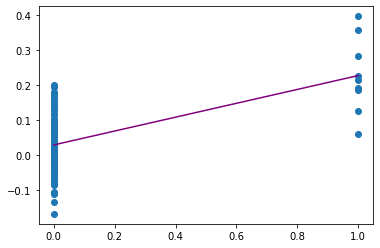

In [6]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='purple')
plt.show()

In [7]:
df = pd.DataFrame(data) 

x = df['is2022']
y = df['gasPriceDiff']

y = sm.add_constant(y)

model = sm.OLS(x, y).fit()
predictions = model.predict(y) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 is2022   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     90.28
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           2.02e-17
Time:                        12:09:38   Log-Likelihood:                 50.327
No. Observations:                 171   AIC:                            -96.65
Df Residuals:                     169   BIC:                            -90.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0158      0.016     -1.014   